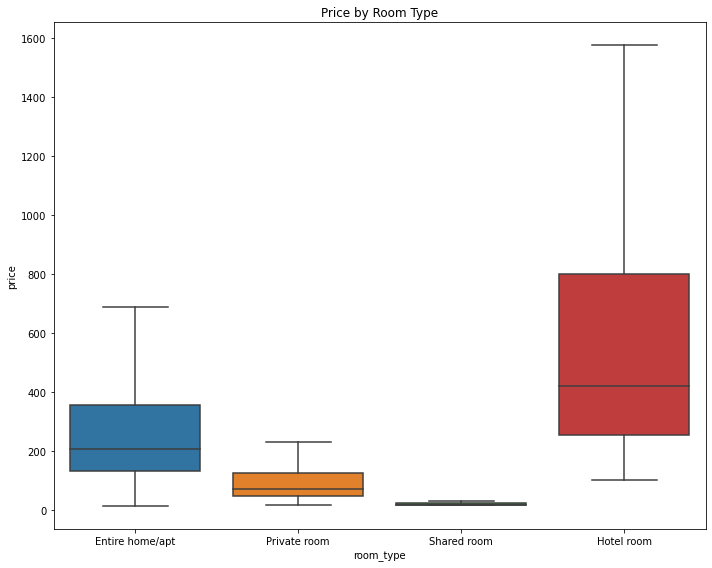

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/abiga/Downloads/listings-2.csv")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='room_type', y='price', showfliers=False)
plt.title("Price by Room Type")
plt.tight_layout()
plt.show()

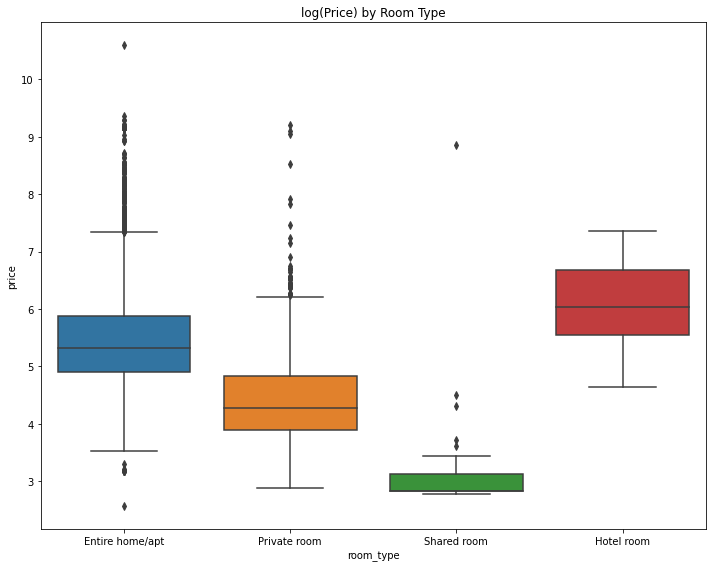

In [2]:
#try to log price instead
df = pd.read_csv("C:/Users/abiga/Downloads/listings-2.csv")
plt.figure(figsize=(10, 8))
loggy=np.log(df['price'])
sns.boxplot(data=df, x='room_type', y=np.log(df['price']))
plt.title("log(Price) by Room Type")
plt.tight_layout()
plt.show()


#i think log is better than just not showing the outliers

In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Drop any rows with missing latitude, longitude, or price
df = df.dropna(subset=['latitude', 'longitude', 'price'])

# Step 4: Make a HeatMap data list
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in df.iterrows()]

# Step 5: Create a base map centered around Austin
m = folium.Map(location=[30.2672, -97.7431], zoom_start=12)

# Step 6: Add the HeatMap
HeatMap(heat_data,
        radius=15,
        blur=10,
        max_zoom=1).add_to(m)
# Step 7: Add Tourist Attractions
tourist_attractions = [
    {"name": "Texas State Capitol", "lat": 30.2747, "lon": -97.7404},
    {"name": "Lady Bird Lake", "lat": 30.2604, "lon": -97.7490},
    {"name": "Zilker Park", "lat": 30.2669, "lon": -97.7725},
    {"name": "Barton Springs Pool", "lat": 30.2644, "lon": -97.7720},
    {"name": "South Congress Avenue", "lat": 30.2491, "lon": -97.7496},
    {"name": "The University of Texas at Austin", "lat": 30.2850, "lon": -97.7345},
    {"name": "Sixth Street Historic District", "lat": 30.2676, "lon": -97.7393},
    {"name": "Mount Bonnell", "lat": 30.3215, "lon": -97.7737},
    {"name": "Blanton Museum of Art", "lat": 30.2803, "lon": -97.7370}
]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'cadetblue', 'pink']

# Add markers for each tourist attraction with a different color
for idx, place in enumerate(tourist_attractions):
    folium.Marker(
        location=[place["lat"], place["lon"]],
        popup=place["name"],
        icon=folium.Icon(color=colors[idx % len(colors)], icon='info-sign')
    ).add_to(m)

# Show the map
m

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/abiga/Downloads/listings-2.csv")
price=df['price']
print(price.describe())
print("NA count:",df['price'].isna().sum())

count    11029.000000
mean       341.934627
std        797.943897
min         13.000000
25%        114.000000
50%        189.000000
75%        332.000000
max      39741.000000
Name: price, dtype: float64
NA count: 4402


In [5]:
print(df['price'].isna().sum())

4402


In [6]:
print(df['price'].skew())
#we need to use median
dfclean = df['price'].fillna('189')
print(dfclean.isna().sum())

17.564860132556646
0
